HOW WELL DO JOBS AND SKILLS PAY FOR DATA ANALYSTS

METHODOLOGY
1.Evaluate median salary for top 6 data jobs
2.Find median salary per skill for Data Analysts
3.Visualize for highest paying skills and most demanded skills

In [17]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
df_ind=df[(df['job_country']== "India") ].dropna(subset=["salary_year_avg"])
job_titles=df_ind["job_title_short"].value_counts().index[:6].tolist()

In [19]:
df_ind_top6=df_ind[df_ind['job_title_short'].isin(job_titles)]
job_order=df_ind_top6.groupby('job_title_short')["salary_year_avg"].median().sort_values(ascending=False).index


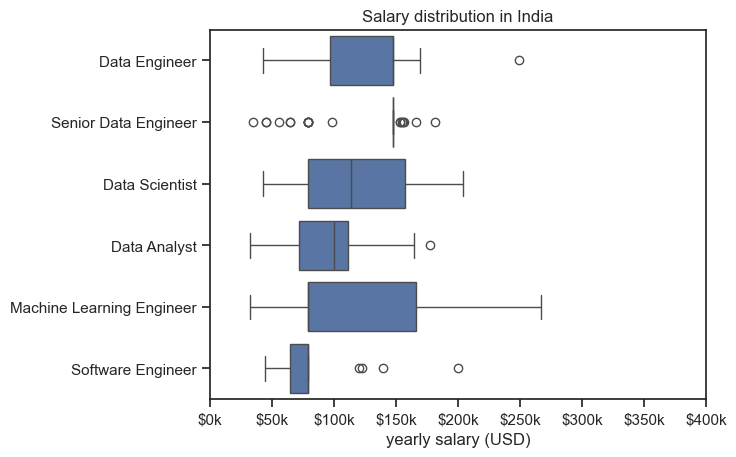

In [20]:
sns.boxplot(data=df_ind_top6,x="salary_year_avg",y="job_title_short",order=job_order)
sns.set_theme(style="ticks")
plt.title('Salary distribution in India')
plt.xlabel("yearly salary (USD)")
plt.ylabel('')
plt.xlim(0,400000)
ticks_x=plt.FuncFormatter(lambda y ,pos:f'${int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()